In [1]:
import sklearn
import pandas
from pandas import pivot_table
import numpy as np
import matplotlib
import matplotlib.pylab as plt
import os, sys
import traceback
%matplotlib inline

from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.preprocessing import StandardScaler
data = load_boston()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)


In [10]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)
X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

In [11]:
regressor = SGDRegressor(loss='squared_loss')
scores = cross_val_score(regressor, X_train, y_train, cv=5)
print 'Cross validation r-squared scores:', scores
print 'Average cross validation r-squared score:', np.mean(scores)
regressor.fit_transform(X_train, y_train)
y_predict = regressor.predict(X_test)
print 'Test set r-squared score', regressor.score(X_test, y_test)

Cross validation r-squared scores: [ 0.79320168  0.77829811  0.4937431   0.74121059  0.63444044]
Average cross validation r-squared score: 0.688178783242
Test set r-squared score 0.725876161124


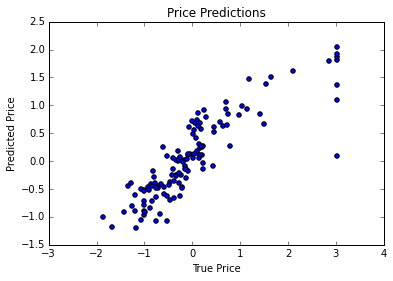

In [18]:
plt.scatter(y_test, y_predict)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Price Predictions')
plt.show()

In [2]:
bos_data = load_boston()
df_bos = pandas.DataFrame(data=bos_data.data, columns=bos_data.feature_names)
df_bos_value = pandas.DataFrame(data=bos_data.target, columns=['Median Value (1000s)'])

bos = pandas.concat([df_bos, df_bos_value,], axis=1) 

In [3]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Median Value (1000s)
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
bos.to_csv("boston_housing_data.csv", index=False)